# '온라인 공론장'으로서의 청와대 청원 분석
 
 2020년, 한국 사회는 정치적으로 역동적인 사회라 일컬을 수 있을 것이다. 현 시점에서 두드러지는 것은 아래로부터의 목소리가 여러 방면에서 표출되고 있다는 것인데, 이는 1960년대 이후부터 독재정권 하에서의 형식적 민주주의에서 벗어나 점차 '국민이 국가의 주인이다'라는 실질적 민주주의가 제도적으로 정착되고 있다는 징후로 여겨진다. 독일의 철학자이자 사회학자인 위르겐 하버마스는 '공론장'이라는 개념을 제시하는데, 그 사회가 어떤 중대한 정치적 사안에 대해서 얼마나 많은 상호논박과 토의가 있었는지 등이 그 사회의 퀄리티 즉, 민주주의가 얼마나 성숙한가를 결정한다고 주장한다. 이와 연결하여 '숙의 민주주의'를 제시하는데, 사회 전체의 미래 이익을 위해 무엇이 더 타당한가를 결정하는 정치적 과정은 충분한 '숙의'의 과정이 필요하며, 그 결과가 어떻든지 간에 개인, 조직, 집단들이 충분한 숙의의 시간을 가지고 논의하는 민주주의야 말로 성숙한 민주주의라는 것이다. 이를 토대로 볼 때 현 '청와대 청원'은 '온라인 공론장'으로서 기능한다는 점에서 유효하다. 국민이라면 누구나 청와대 청원 홈페이지에 자신의 상황을 청원할 수 있다는 점에서 아래로부터의 목소리를 담는다는 특징을 가지며, 동일한 사안에 대한 상반된 여러 주장들이 함께 공존하여 이에 대한 국민들의 동의를 얻는다는 점에서 상호논박이 가능한 정치적 제도라고 볼 수 있을 것이다. 더불어 '온라인' 기반의 공론장은 정당-국회와 같은 제도적 정치권에서 직접적으로 해결되지 못하는 여러가지의 목소리들을 직접적으로 담을 수 있고 이에 대한 답변을 청와대로부터 얻어낼 수 있다는 점에서 기존의 제도정치권에서 해결하지 못한 사안들을 담을 수 있다는 효과적인 도구라 할 수 있다.

 따라서 우리는 '온라인 공론장'으로서 작동하는 청와대 청원을 분석함으로써 첫째, '온라인 공론장'으로서의 역할을 실질적으로 담보하고 있는지 파악하고자 하였고, 둘째, 기존 정치제도권에서 해결되지 못했던 목소리들을 담보할 수 있는지에 대해 분석해보고자 하였다. 이를 위해 청와대로부터 답변을 받은 20만 이상의 청원들만 한정하여 분석하였다. (우리의 수준상 모든 청원 데이터를 크롤링해 분석할 수 없었다는 한계를 지니며, 주어진 데이터 내에서 최대한 이끌어낼 수 있는 부분들을 분석하고자 하였다.) 

## 청와대 청원 데이터 가져오기 

웹 크롤링을 이용하여 청와대 청원 홈페이지의 답변된 청원만을 가져왔다. urllib과 BeautifulSoup을 사용해 크롤링했으며 크롤링한 데이터들은 판다스의 DataFrame에 담아주었다. 현시점(2020.06.27)에서 답변된 청원은 총 175호까지 답변되었다. 

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
titles = []
start_date = []
end_date = []
num_consent = []
answer_date = []
address = []

def get_info(url): 
    res = urlopen(url)
    soup = BeautifulSoup(res, "html.parser")
    
    # get titles, address(url)
    contents = soup.find_all('div', class_='ans_name_title')
    for n in range(0,len(contents)):
        content = contents[n]
        titles.append(content.a.get_text())
        add_url = str(content.find('a')['href'])
        address.append('https://www1.president.go.kr'+add_url)
    
    # 청원시작과 끝 날짜, 참여인원, 답변일 정보 얻기 
    infos = soup.find_all('ol', class_='ans_name_info')
    for info in infos: 
        start_date.append(info.find('p', class_='ans_list1_2').get_text()[2:-2])
        end_date.append(info.find('p', class_='ans_list2_2').get_text()[2:-2])
        num_consent.append(info.find('p', class_='ans_list3_2').get_text()[2:-2])
        answer_date.append(info.find('p', class_='ans_list4_2').get_text()[2:-2])          

In [3]:
for n in range(1,13): 
    url = 'https://www1.president.go.kr/petitions/answer?page=%d' % n
    get_info(url)

In [4]:
data = {'제목':titles, '청원시작일':start_date, '청원종료일': end_date,
       '참여인원': num_consent, '청원답변일':answer_date, 'URL':address}
df = pd.DataFrame(data)
df.head()

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL
0,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 '섹시팬티', '공주님...",2020. 04. 28,2020. 05. 28,"225,764",2020. 06. 26,https://www1.president.go.kr/petitions/588455
1,등교 개학 시기를 미루어주시기 바랍니다.,2020. 04. 24,2020. 05. 24,"255,333",2020. 06. 24,https://www1.president.go.kr/petitions/588340
2,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020. 04. 07,2020. 05. 07,"273,513",2020. 06. 05,https://www1.president.go.kr/petitions/587827
3,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020. 04. 02,2020. 05. 02,"1,007,040",2020. 06. 02,https://www1.president.go.kr/petitions/587624
4,세월호 전면재수사,2020. 04. 01,2020. 05. 01,"216,118",2020. 06. 01,https://www1.president.go.kr/petitions/587604


In [5]:
# 1차 저장 
df.to_csv('BlueHouse Petition data.csv', sep=',', encoding='utf-8')

In [6]:
import pandas as pd

petition = pd.read_csv('BlueHouse Petition data.csv', thousands=',', encoding='utf-8', index_col=0)
petition.head()

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL
0,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 '섹시팬티', '공주님...",2020. 04. 28,2020. 05. 28,225764,2020. 06. 26,https://www1.president.go.kr/petitions/588455
1,등교 개학 시기를 미루어주시기 바랍니다.,2020. 04. 24,2020. 05. 24,255333,2020. 06. 24,https://www1.president.go.kr/petitions/588340
2,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020. 04. 07,2020. 05. 07,273513,2020. 06. 05,https://www1.president.go.kr/petitions/587827
3,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020. 04. 02,2020. 05. 02,1007040,2020. 06. 02,https://www1.president.go.kr/petitions/587624
4,세월호 전면재수사,2020. 04. 01,2020. 05. 01,216118,2020. 06. 01,https://www1.president.go.kr/petitions/587604


In [7]:
len(petition)

176

대략 5-7분 정도 소요된다. 

In [8]:
import re 
import time
from tqdm import tqdm_notebook
from urllib.request import urlopen
from bs4 import BeautifulSoup

category =[]
content = []
answer = []
person = []

for n in tqdm_notebook(petition.index): 
    url = urlopen(petition['URL'][n]) 
    if n / 2 == 0:
        time.sleep(1)
    else: 
        time.sleep(2)
    soup = BeautifulSoup(url, "html.parser") 
    
    # get category 
    sector = soup.find('ul', class_='petitionsView_info_list')
    try: 
        category.append(sector.li.get_text()[4:])
    except AttributeError:
        print('AttributeError: index-', n, 'URL-', petition['URL'][n])
    person.append(sector.find_all('li')[3].get_text()[3:-6])


    # get petition content 
    content_raw = soup.find_all('div', class_='View_write')
    try: 
        if len(content_raw) > 1:
            content_raw_text = content_raw[1].get_text()
        else: 
            content_raw_text = content_raw[0].get_text()   
    except IndexError: 
        print('IndexError:', petition['URL'][n])
    
    content_split = re.split('\r|\t|\n|\xa0', content_raw_text)
    content.append(''.join(content_split))

    # get petition answer 
    answer_raw = soup.find_all('div', class_='pr_tk25')
    if len(answer_raw) > 1: 
        answer_raw_text = re.split("\r|\t|\n|\xa0", answer_raw[1].get_text())
    else: 
        answer_raw_text = re.split("\r|\t|\n|\xa0", answer_raw[0].get_text())
    answer_raw_text = ' '.join(answer_raw_text)
    answer.append(answer_raw_text[7:]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


In [9]:
print(len(category), len(content), len(answer), len(person))

176 176 176 176


In [10]:
petition['카테고리'] = category
petition['청원내용'] = content
petition['청원답변'] = answer
petition['청원인'] = person

In [11]:
petition[petition['청원내용'] == '']

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변,청원인
146,합정 **** 불법 누드촬영,2018. 05. 17,2018. 06. 16,201590,2018. 05. 21,https://www1.president.go.kr/petitions/235102,인권/성평등,,,naver
147,위장•몰래카메라 판매금지와 몰카범죄 처벌을 강화해주세요.,2018. 03. 23,2018. 04. 22,209494,2018. 05. 21,https://www1.president.go.kr/petitions/173355,안전/환경,,,naver
148,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,2018. 05. 11,2018. 06. 10,419006,2018. 05. 21,https://www1.president.go.kr/petitions/230552,인권/성평등,,,naver
151,다산신도시 실버택배 비용은 입주민들의 관리비로 충당해야합니다.,2018. 04. 17,2018. 05. 17,302082,2018. 05. 04,https://www1.president.go.kr/petitions/203181,행정,,,naver


인덱스 146, 147, 148, 151에서 동영상이 첨부되어 있어 청원내용과 청원답변이 제대로 추출되지 않아 따로 다시 담아주었다.

In [12]:
for n in [146, 147, 148, 151]:
    url = urlopen(petition['URL'][n]) 
    soup = BeautifulSoup(url, "html.parser") 
    
    # get petition content 
    content_raw = soup.find_all('div', class_='View_write')
    content_raw_text = content_raw[2].get_text()
    content_split = re.split('\r|\t|\n|\xa0', content_raw_text)
    petition['청원내용'][n] = ''.join(content_split)
    
    # get petition answer 
    answer_raw = soup.find_all('div', class_='pr_tk25')
    answer_raw_text = re.split("\r|\t|\n|\xa0", answer_raw[2].get_text())
    answer_raw_text = ' '.join(answer_raw_text)
    petition['청원답변'][n] = answer_raw_text[7:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [13]:
petition.to_csv('Final BlueHouse Petition data.csv', sep=',', encoding='utf-8')

최종적으로 답변된 청와대 청원 데이터를 csv 형태로 저장하여 담아주었다.

## EDA 

청와대 청원 분석을 하기 위해 필요한 모듈들을 import 해주었고 한글폰드 문제를 해결하기 위한 코드도 넣어주었다. 한글 폰트 설정 시 잘 작동하지 않을 수 있는데, 그럴 때에는 런타임 다시 시작을 한다음, 다시 실행해주면 잘 작동한다.

In [14]:
import pandas as pd
import platform
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
# 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


### 데이터 살펴보기

In [16]:
petition = pd.read_csv('Final BlueHouse Petition data.csv', 
                       index_col=0, parse_dates=['청원시작일','청원종료일','청원답변일'])
petition.head()

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변,청원인
0,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 '섹시팬티', '공주님...",2020-04-28,2020-05-28,225764,2020-06-26,https://www1.president.go.kr/petitions/588455,육아/교육,안녕하십니까?저는 아이들의 인권이 최우선이라고 생각하며두 남매를 열심히 키우고 있는...,안녕하십니까. 청와대 교육비서관 박경미입니다. 울산의 한 초등학교 교사의 성비위...,naver
1,등교 개학 시기를 미루어주시기 바랍니다.,2020-04-24,2020-05-24,255333,2020-06-24,https://www1.president.go.kr/petitions/588340,육아/교육,"최근 코로나19의 신규 확진자 수가 50명 이하로 감소하였고, 정부는 등교 개학을 ...",안녕하십니까. 부총리 겸 교육부 장관 유은혜입니다. 코로나19가 완전히 종식되거...,kakao
2,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020-04-07,2020-05-07,273513,2020-06-05,https://www1.president.go.kr/petitions/587827,문화/예술/체육/언론,최근 MBC의 잇따른 보도에 따르면 종편 채널A 기자가 현직 검사장과의 친분을 내세...,안녕하십니까. 방송통신위원회 위원장 한상혁입니다. 오늘 답변드릴 ‘채널A와 TV조선...,facebook
3,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020-04-02,2020-05-02,1007040,2020-06-02,https://www1.president.go.kr/petitions/587624,기타,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 「렌트카 훔쳐 사망사고 낸 ...,facebook
4,세월호 전면재수사,2020-04-01,2020-05-01,216118,2020-06-01,https://www1.president.go.kr/petitions/587604,기타,저는 세월호 희생자 단원고 2학년 6반 순범이 큰 누나 입니다.6주기가 3주도 안남...,안녕하십니까. 시민참여비서관 이기헌입니다. 「세월호 참사 전면 재수사」국민청원에...,facebook


In [17]:
petition.shape

(176, 10)

총 176개의 로우와 10개의 컬럼이 잘 가져와 진 것을 확인할 수 있다.

In [18]:
#df를 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형등 살펴보기
petition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   제목      176 non-null    object        
 1   청원시작일   176 non-null    datetime64[ns]
 2   청원종료일   176 non-null    datetime64[ns]
 3   참여인원    176 non-null    int64         
 4   청원답변일   176 non-null    datetime64[ns]
 5   URL     176 non-null    object        
 6   카테고리    176 non-null    object        
 7   청원내용    176 non-null    object        
 8   청원답변    173 non-null    object        
 9   청원인     176 non-null    object        
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 15.1+ KB


petition 데이터 칼럼의 특성을 살펴볼 수 있는데, 앞서 청원시작일, 청원종료일, 청원답변일을 날짜 데이터로 바꾸어주어 datetime으로 인식되게 만들어주었고, 그 이외에도 참여인원은 숫자형으로, 나머지는 object 형태로 잘 추출되었다는 것을 알 수 있다. 

In [19]:
petition['청원인'].value_counts()

naver       120
facebook     30
kakao        16
twitter      10
Name: 청원인, dtype: int64

청원인을 보았을 때, SNS로 연동하여야만 청원이 가능하며 naver를 통해 청원을 많이 하고있다는 것 또한 알 수 있다.

### 필요한 데이터만 남기기

URL과 청원종료일, 청원답변은 분석시 필요하지 않아 해당 칼럼을 삭제해주었다. 특히나 청원종료일은 해당 답변이 20만의 청원 동의수를 얻는데 걸린 시간이 아닌 청원에 투표할 수 있는 기간 자체를 의미하므로 분석에 필요한 컬럼이 아니라 판단해 삭제하였다.

In [20]:
petition.drop(['URL', '청원종료일','청원답변'], axis=1, inplace=True)

In [21]:
petition.head(5)

,제목,청원시작일,참여인원,청원답변일,카테고리,청원내용,청원인
0,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 '섹시팬티', '공주님...",2020-04-28,225764,2020-06-26,육아/교육,안녕하십니까?저는 아이들의 인권이 최우선이라고 생각하며두 남매를 열심히 키우고 있는...,naver
1,등교 개학 시기를 미루어주시기 바랍니다.,2020-04-24,255333,2020-06-24,육아/교육,"최근 코로나19의 신규 확진자 수가 50명 이하로 감소하였고, 정부는 등교 개학을 ...",kakao
2,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020-04-07,273513,2020-06-05,문화/예술/체육/언론,최근 MBC의 잇따른 보도에 따르면 종편 채널A 기자가 현직 검사장과의 친분을 내세...,facebook
3,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020-04-02,1007040,2020-06-02,기타,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,facebook
4,세월호 전면재수사,2020-04-01,216118,2020-06-01,기타,저는 세월호 희생자 단원고 2학년 6반 순범이 큰 누나 입니다.6주기가 3주도 안남...,facebook


### 참여인원순 TOP10 청원

In [22]:
Top10 = petition[['카테고리', '제목', '참여인원']]
Top10.sort_values(by='참여인원', ascending=False, na_position = 'first').head(10)

,카테고리,제목,참여인원
28,안전/환경,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2715626
29,안전/환경,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,2026252
75,정치개혁,자유 한국당 정당해산 청원,1831900
23,기타,문재인 대통령님을 응원 합니다!,1504597
22,정치개혁,문재인 대통령 탄핵을 촉구합니다.,1469023
26,인권/성평등,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.",1449521
118,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,1192049
3,기타,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,1007040
33,보건복지,중국인 입국 금지 요청,761833
58,정치개혁,청와대는 조국 법무부장관 후보자의 임명을 반드시 해주십시오!!,757730


참여인원순으로 정렬해보았을 때 대한민국에서 크게 이슈가 된 사건들과 함께 정치제도와 관련된 사안들이 상위에 올라가 있다는 것을 알 수 있다. 

In [23]:
petition['참여인원'].mean()

346428.9715909091

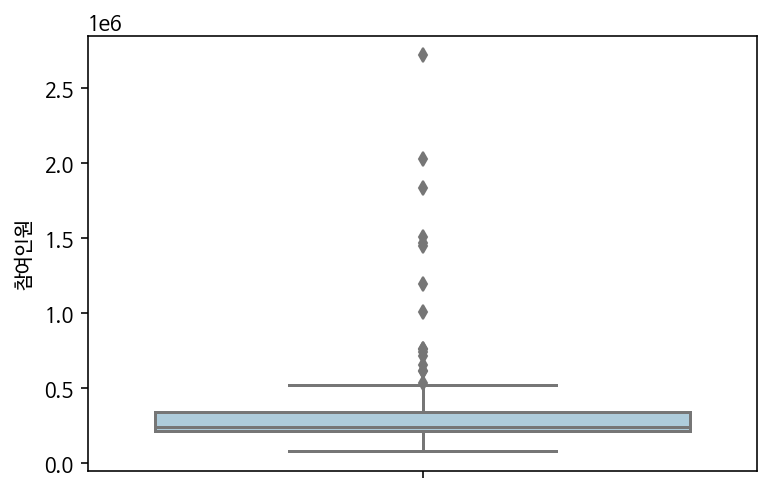

In [24]:
sns.boxplot(y="참여인원", data=petition, palette="Paired")

평균이 대략 35만명 정도라는 것을 고려했을 때, 상위 top10의 청원들은 상당히 많은 수의 참여인원이 해당 청원에 참여했다는 것을 알 수 있다.boxplot 시각화에서도 확인할 수 있듯, 이러한 청원은 아웃라이어에 속할 정도로 엄청난 청원 동의수를 받은 사건이다. 100만 여명 이상의 청원동의를 받은 청원들은 한국 사회에서 상당한 이슈가 되었다고 것이라 해석할 수 있다.

### 청원 답변기간 분석

앞서 청와대 청원 분석에서 밝힌 바와 같이 온라인 공론장으로서의 청와대 청원은 정치 제도 권내에서 해결되지 못하는 사안들을 직접 청원을 올려 청와대로부터 답변을 얻을 수 있다는 점에서 직접 민주주의로서의 성격을 지닌다고 말할 수 있다. 따라서 청와대 청원 개시일부터 청와대 청원 답변까지의 시간을 분석해보아 국민들의 청원에 대해 얼마만큼의 기간이 소요되는지 분석해보고자 하였다.

In [25]:
#답변기간 계산
petition['청원 답변기간'] = (petition['청원답변일'] - petition['청원시작일']).dt.days

In [26]:
petition['청원 답변기간'].unique()

array([ 59,  61,  60,  56,  54,  58, 102,  51,  57,  76,  80,   6,   4,
        14,  37,  65,  81,  91,  90, 114,  84,  50,  53,  45,  49,  27,
        30,  43,  39,  48,  25,  19,   2, 153,  10,  28,  24,  44,  46,
       107,  55,  52,  31,  42,  23,  41,  17,  36,  47,  29,  40,  15,
        62,  32,  22])

청원개시일로부터 청와대의 답변을 듣기까지 평균 50일 정도의 시간이 소요되는 것을 알 수 있다. 기존의 법이 만들어지는 과정은 정부 입법 절차의 경우 입법 계획의 수립으로부터 공포까지 총 14단계를 거쳐야 하며 아무리 최소한으로 잡아도 187일 이상의 소요시간이 걸리게 된다. 국회 입법 절차 또한 통과된 법안이 시행되기까지 평균 5.9개월이 소요되고 국회를 통과해 제도화된 법률이 시행되는 데에는 평균 5.9개월이 소요된다. 

청와대 국민 청원이 꼭 법안 발의나 법안 제정으로 이어지는 것은 아니나 해당 청원에 대해서는 청와대로부터 직통으로 청원 해결에 대한 답변을 평균 50일 내로 얻을 수 있다는 점에서 시간 단축의 면에서 효율적인 제도라 판단할 수 있다. 

In [27]:
petition.sort_values(by='청원 답변기간').head(10)

,제목,청원시작일,참여인원,청원답변일,카테고리,청원내용,청원인,청원 답변기간
87,안녕하세요. 증인 윤지오입니다.,2019-03-30,318057,2019-04-01,인권/성평등,안녕하세요. 증인 윤지오입니다.우선 고인의 이름으로 불리우는 사건 자체가 피해자가 ...,naver,2
30,"가해자 n번방박사,n번방회원 모두 처벌해주세요",2020-03-20,650579,2020-03-24,안전/환경,n번방 박사라는 악마같은 인간은아동·청소년을 포함한 수십 명의 여성을 협박·강요해 ...,naver,4
31,N번방 대화 참여자들도 명단을 공개하고 처벌해주십시오,2020-03-20,457487,2020-03-24,인권/성평등,이번에 N번방 운영자가 검거되었습니다. 미성년자 소녀들을 대상으로 극악무도한 성범죄...,naver,4
29,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,2020-03-20,2026252,2020-03-24,안전/환경,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",naver,4
146,합정 **** 불법 누드촬영,2018-05-17,201590,2018-05-21,인권/성평등,한 유명 유튜버의 사례저는 성범죄 피해자입니다. 꼭 한번만 제 이야기를 들어주세요....,naver,4
89,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다.,2019-03-12,738566,2019-03-18,기타,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다. 수사 기간을 연장해 장자연씨가...,twitter,6
28,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2020-03-18,2715626,2020-03-24,안전/환경,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,naver,6
148,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,2018-05-11,419006,2018-05-21,인권/성평등,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.사건은 굉장히 빠르게 처리되...,naver,10
90,고 장자연씨 관련 증언한 윤**씨 신변보호 청원,2019-03-08,386506,2019-03-18,기타,"고 장자연씨 관련, 어렵게 증언한 윤**씨의신변보호를 요청드립니다.목격자진술은 정말...",naver,10
98,https 차단 정책에 대한 반대 의견,2019-02-11,269180,2019-02-21,기타,안녕하세요. 저는 대한민국 국민의 한 사람으로서 https 차단 정책에 대해 반대합...,naver,10


가장 짧은 기간 내로 청와대의 답변을 받았던 청원들은 위와 같다. 故장자연 수사 사건, 텔레그램 n번방 사건, 불법촬영 사건 등의 청원이 일주일 이내로 빠른 청와대 답변을 들었다는 것을 확인할 수 있다.

### 카테고리별 청원 

카테고리별 청원 분석은 각 카테고리별로 공론장에서 많이 논의되고 있는지를 파악할 수 있다. 이는 한국에서의 현재 이슈가 되고 있는 사안들을 보여주는 것이기도 하며, 어떤 현안이 제도정치권 내에서 해결되지 않는지 또한 단서를 얻을 수 있다는 점에서 의미있는 분석이라고 할 수 있다.

청와대 국민청원에는 15개의 카테고리가 있다. 15개의 카테고리 중 어느 분야의 청원 수가 많은지 살펴보고자 데이터에서 '카테고리'값을 뽑아내, 청원 수가 많은 순으로 내림차순 정렬을 한다.
내림차순한 결과를 보면 인권/성평등 분야의 청원 수가 다른 분야에 비해 2배정도 많음을 알 수 있다. 청원 수가 20개가 넘는 분야는 인권/성평등, 정치개혁, 기타, 안전/환경 4개 분야이다.

In [28]:
petition_category = pd.DataFrame(petition['카테고리'].value_counts()).reset_index()
petition_category.columns = ['카테고리', '청원 수']
petition_category

,카테고리,청원 수
0,인권/성평등,46
1,정치개혁,24
2,기타,23
3,안전/환경,22
4,문화/예술/체육/언론,15
5,육아/교육,12
6,반려동물,8
7,보건복지,6
8,교통/건축/국토,5
9,외교/통일/국방,5


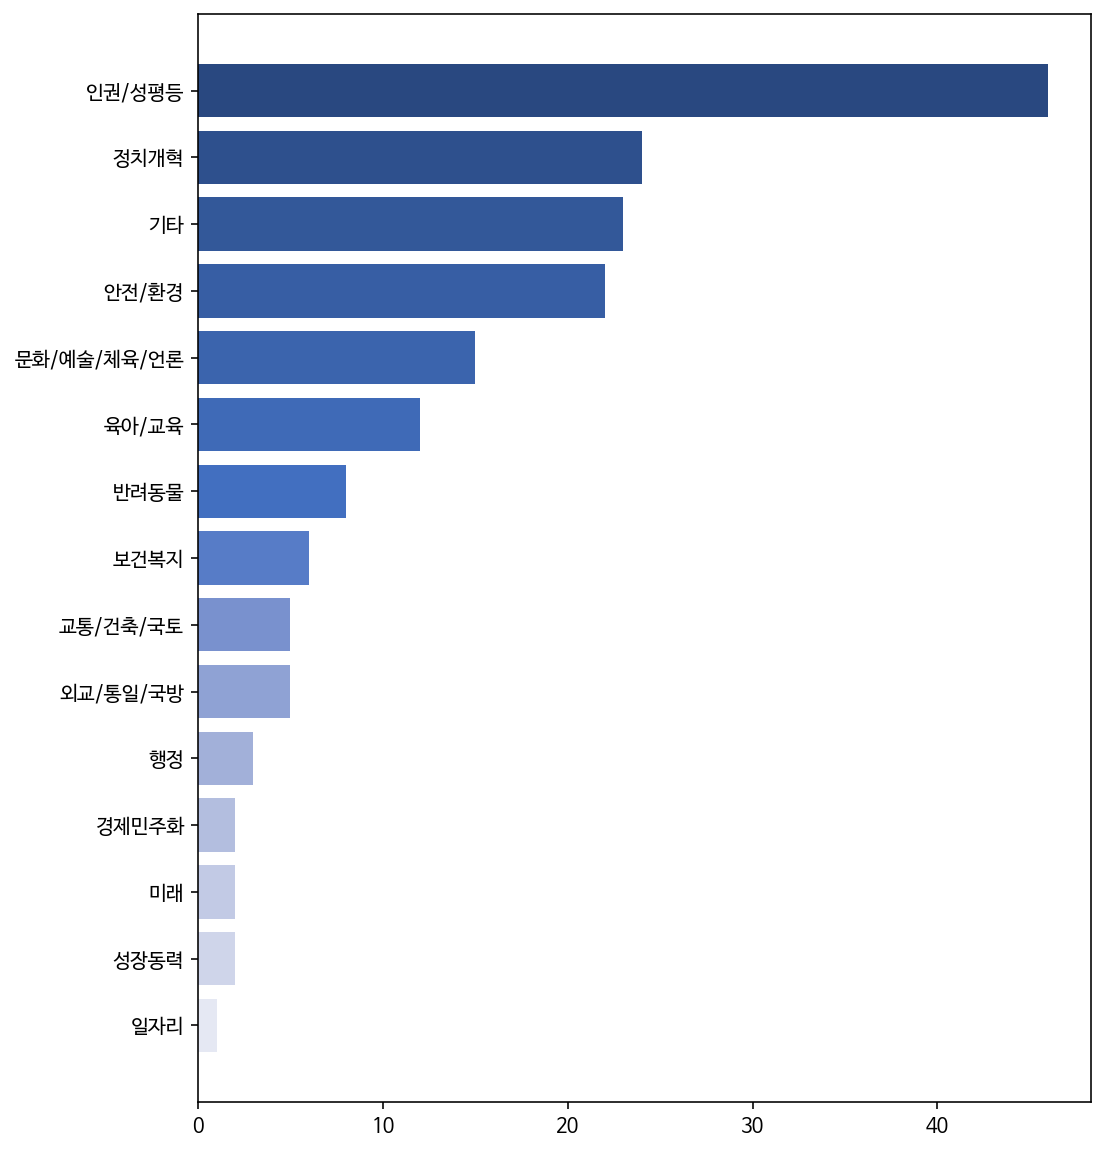

In [29]:
reference = petition_category['카테고리']
value = petition_category['청원 수']

plt.figure(figsize = (8, 10))
plt.barh(reference,value,color = ['#294880','#2E508D','#335899','#375EA4','#3B64AD','#3F6AB7','#426FC0','#577CC7','#7991CE','#8FA2D4','#A2B0D9','#B3BEDF','#C2CAE5','#CFD5EA','#E5E8F3'])
plt.gca().invert_yaxis()
plt.show()

막대그래프로 시각화 한 결과이다. 인권/성평등 분야에 대한 관심이 다른 분야에 비해  높은 것을 확인할 수 있다. 


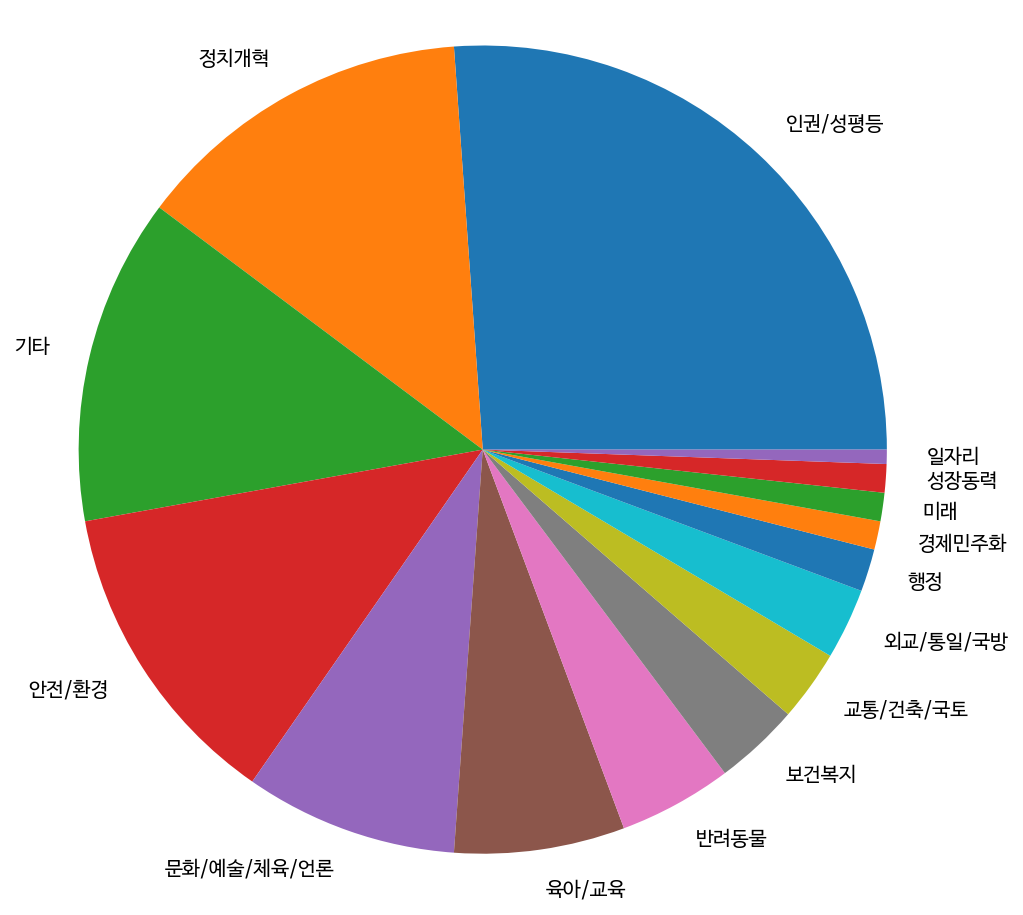

In [30]:
# 파이그래프로 시각화한 결과.
group_names1 = petition_category['카테고리']
group_sizes1 = petition_category['청원 수']
plt.figure(figsize=(8,8))
plt.pie(group_sizes1, labels = group_names1,textprops = {'fontsize':10})
plt.axis('equal')
plt.show()

이는 파이그래프로 시각화해 본 결과이다. 상위 4분야(인권/성평등, 정치개혁, 기타, 안정/환경)가 차지하는 비율이 50%가 넘는 것을 확인할 수 있다.

### Wordcloud
청원수 기준 상위 3개의 카테고리를 선정해 Wordcloud로 시각화해 본다. 상위 3개의 카테고리는 인권/성평등, 정치개혁, 안전/환경이다. (기타는 다양한 청원들이 있어 특정한 단어를 선정할 수 없어 제외하였다.)

In [31]:
petition = pd.read_csv('Final BlueHouse Petition data.csv', 
                       index_col=0, parse_dates=['청원시작일','청원종료일','청원답변일'])

In [32]:
temp = petition['카테고리'].value_counts()
category =  pd.DataFrame(temp).reset_index()
category.columns = ['카테고리','청원 수']
category

,카테고리,청원 수
0,인권/성평등,46
1,정치개혁,24
2,기타,23
3,안전/환경,22
4,문화/예술/체육/언론,15
5,육아/교육,12
6,반려동물,8
7,보건복지,6
8,교통/건축/국토,5
9,외교/통일/국방,5


In [33]:
pt_category1 = petition[petition['카테고리'] == '인권/성평등' ]
pt_category2 = petition[petition['카테고리'] == '정치개혁' ]
pt_category3 = petition[petition['카테고리'] == '안전/환경' ]

In [34]:
!pip install soynlp
!pip show soynlp

Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: scikit-learn, numpy, scipy, psutil
Required-by: 


In [35]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [36]:
sample = pt_category1.loc[7,'제목']
sample

'유/아동 성착취 동영상 유통시킨 다크웹 손모씨의 미국 법무부 강제송환을 실행해주십시오.'

In [37]:
# 개행문자 제거
def preprocessing(text):
  text = re.sub('\\\\n', ' ', text)
  return text

In [38]:
# 인권/성평등
pt_category1.head(5)

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변,청원인
7,유/아동 성착취 동영상 유통시킨 다크웹 손모씨의 미국 법무부 강제송환을 실행해주십시오.,2020-03-23,2020-04-22,219721,2020-05-22,https://www1.president.go.kr/petitions/586926,인권/성평등,생후 6개월의 신생아부터 아동에 이르기까지 광범위한 피해자의 성착취 동영상을 유통했...,안녕하십니까. 법무부 장관 추미애입니다. 지난 3월 23일 청와대 국민청원 게시...,facebook
8,"N번방 담당판사 오덕식을 판사자리에 반대,자격박탈을 청원합니다.",2020-03-27,2020-04-26,466900,2020-05-22,https://www1.president.go.kr/petitions/587323,인권/성평등,오덕식 판사를 n번방 사건에서 제외시켜 주십시오.최종범 사건의 판결과 피해자이신 고...,"안녕하십니까, 디지털소통센터장 강정수입니다. 오늘은 ‘N번방’ 사건과 관련한 청...",kakao
10,<텔레그램 n번방 사건 특별조사팀을 서지현 검사를 필두로 한 80%이상 여성 조사팀...,2020-03-24,2020-04-23,286101,2020-05-22,https://www1.president.go.kr/petitions/587130,인권/성평등,<텔레그램 n번방 사건 특별조사팀을 서지현 검사를 필두로 한 80%이상 여성 조사팀...,"안녕하십니까, 디지털소통센터장 강정수입니다. 오늘은 ‘N번방’ 사건과 관련한 청...",naver
14,초등학생을 성폭행하고 찍은 불법촬영물로 협박해 금품을 갈취하여 인생을 망가뜨린 고등...,2020-03-20,2020-04-19,354260,2020-05-19,https://www1.president.go.kr/petitions/586878,인권/성평등,어린 초등생 아이의 sns를 통해 '안 좋은 소문을 내겠다' 며 협박하여 영상통화로...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 아동‧청소년 대상 성범죄 관...,kakao
15,“오늘 너 킬(KILL)한다”라며 술을 먹이고 제 딸을 합동 강간한 미성년자들을 고...,2020-03-29,2020-04-28,400474,2020-05-19,https://www1.president.go.kr/petitions/587352,인권/성평등,<청원 취지>저는 인천에 사는 두 아이의 엄마입니다.작년 중학교2학년이었던 제 딸은...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 아동‧청소년 대상 성범죄 관...,naver


In [39]:
import re
%time sentences = pt_category1['청원내용'].apply(preprocessing)

CPU times: user 1.33 ms, sys: 15 µs, total: 1.34 ms
Wall time: 1.35 ms


In [40]:
!pip install wordcloud
from soynlp.noun import LRNounExtractor

In [41]:
%%time
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (1671, 930) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 387 nouns are extracted
CPU times: user 186 ms, sys: 4.08 ms, total: 190 ms
Wall time: 191 ms


In [42]:
tdict = {}
stopwords = ['10','누구','하나','처음','정말','자체','해당','2010년','30','감사','확인','하루','한번','가능','계속','관련','그것','그들','단계','당시','당연','대부분','대신','등등','때문','마땅','모두','이후']
n = len(stopwords)
length = len(nouns)
for i in range(0,length-1):
  tdict[list(nouns.keys())[i]] = list(nouns.values())[i].frequency

for i in range(0,n-1):
  del tdict[stopwords[i]]

In [43]:
from collections import Counter
count = Counter(tdict)
count.most_common(15)

[('피해자', 160),
 ('가해자', 105),
 ('사건', 93),
 ('여성', 78),
 ('처벌', 62),
 ('생각', 44),
 ('사람들', 42),
 ('이상', 39),
 ('국민', 39),
 ('경찰', 37),
 ('성범죄', 37),
 ('사진', 36),
 ('수사', 34),
 ('이유', 32),
 ('보호', 31)]

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
if platform.system() == 'Windows':
  font_name = font_manager.FontProperties(fname = font_fname).get_name()
  plt.rcParams["font.family"] = font_family

%matplotlib inline

In [45]:
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath,size=9)

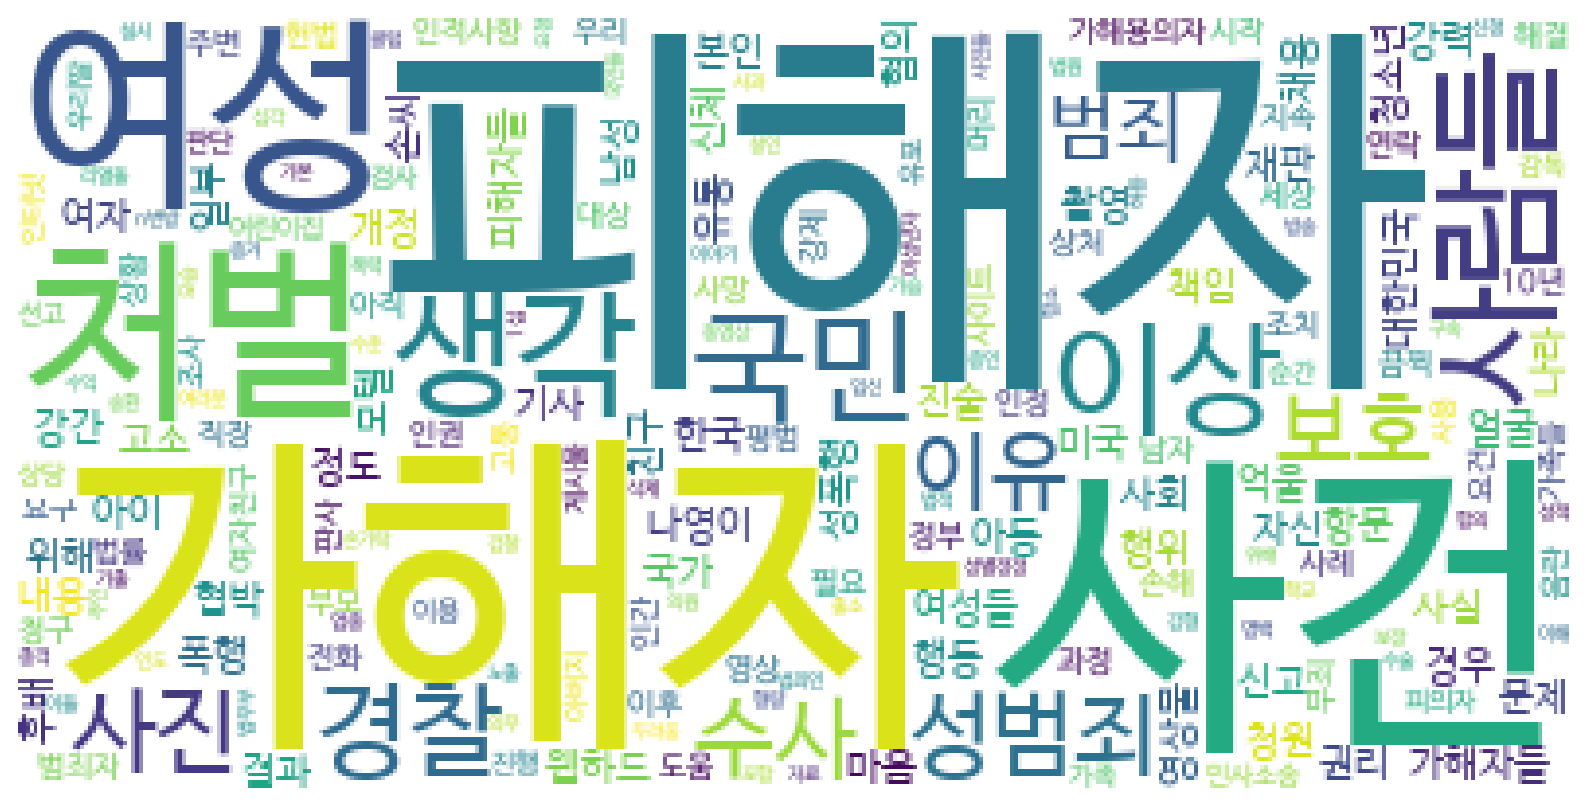

In [46]:
data = count.most_common(length)
tmp_data = dict(data)

wordcloud = WordCloud(font_path = fontpath,
                      max_font_size = 100,
                      relative_scaling = 0.4,
                      background_color= 'white',).generate_from_frequencies(tmp_data)
plt.figure(figsize = (14,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

인권/성평등 분야에서는
'사건', '가해자', '피해자', '여성', '처벌' 키워드가 많이 나왔다는 것을 알 수 있다

In [47]:
# 정치개혁
pt_category2.head(5)

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변,청원인
20,중국인 영주권자의 지방선거 투표권 박탈해야합니다.,2020-03-02,2020-04-01,215646,2020-04-27,https://www1.president.go.kr/petitions/586110,정치개혁,시민권자만 누릴 수 있는 투표권을 소중히 지켜 진정한 자유민주주의를 실현해야합니다....,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 <전자개표기 폐기>와 <지방선거...,twitter
21,전자개표기 폐지 동의하시길 부탁드립니다,2020-02-11,2020-03-12,210801,2020-04-27,https://www1.president.go.kr/petitions/585083,정치개혁,⭕❌ 대한민국 선거제도가 부정선거제도인 이유1. 사전투표용지 발급기 시스템의 소프터...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 <전자개표기 폐기>와 <지방선거...,twitter
22,문재인 대통령 탄핵을 촉구합니다.,2020-02-04,2020-03-05,1469023,2020-04-24,https://www1.president.go.kr/petitions/584936,정치개혁,국민의 한 사람으로서 문재인 대통령의 탄핵을 촉구합니다. 이번 우한 폐렴(신종 코로...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 코로나19 대처와 관련해 <...,naver
25,문재인 대통령님의 탄핵을 원하지 않습니다.,2020-02-27,2020-03-28,356032,2020-04-24,https://www1.president.go.kr/petitions/585795,정치개혁,이명박 전 대통령과 박근혜 전 대통령 재임시절을 생각하면 그야말로 암담했습니다.온갖...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 코로나19 대처와 관련해 <...,naver
34,추미애 법무장관의 해임을 청원합니다,2020-02-03,2020-03-04,335181,2020-03-11,https://www1.president.go.kr/petitions/584755,정치개혁,[ 추미애 법무장관의 해임을 청원합니다. ]우리 검찰의 역사는 정권의 수족역할을 해...,안녕하십니까. 청와대 디지털소통센터장 강정수입니다. 오늘은 ‘윤석열 총장 3대 ...,naver


In [48]:
%time sentences2 = pt_category2['청원내용'].apply(preprocessing)

CPU times: user 1.06 ms, sys: 2 µs, total: 1.06 ms
Wall time: 1.1 ms


In [49]:
%%time
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(sentences2)
nouns2 = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (511, 283) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 98 nouns are extracted
CPU times: user 62.5 ms, sys: 0 ns, total: 62.5 ms
Wall time: 62.4 ms


In [50]:
nouns2

{'SNS': NounScore_v1(frequency=9, score=0.9997162857142857, known_r_ratio=0.7777777777777778),
 '개인': NounScore_v1(frequency=5, score=0.7522955, known_r_ratio=0.6666666666666666),
 '개혁': NounScore_v1(frequency=8, score=0.7520681666666666, known_r_ratio=1.0),
 '검찰': NounScore_v1(frequency=26, score=0.7044533888888888, known_r_ratio=0.8181818181818182),
 '검찰총장': NounScore_v1(frequency=5, score=0.9998936, known_r_ratio=1.0),
 '결과': NounScore_v1(frequency=9, score=0.9993581666666668, known_r_ratio=1.0),
 '공개': NounScore_v1(frequency=7, score=0.9908981666666667, known_r_ratio=0.8571428571428571),
 '공수처': NounScore_v1(frequency=5, score=0.93776, known_r_ratio=0.5),
 '공직자': NounScore_v1(frequency=9, score=0.9996501250000001, known_r_ratio=1.0),
 '과거': NounScore_v1(frequency=6, score=0.9997935, known_r_ratio=1.0),
 '관련': NounScore_v1(frequency=5, score=0.997796, known_r_ratio=0.5),
 '관례': NounScore_v1(frequency=4, score=0.9841725, known_r_ratio=1.0),
 '교수': NounScore_v1(frequency=4, score=0.99

In [51]:
tdict2 = {}
length = len(nouns2)
for i in range(0,length-1):
  tdict2[list(nouns2.keys())[i]] = list(nouns2.values())[i].frequency

count2 = Counter(tdict2)

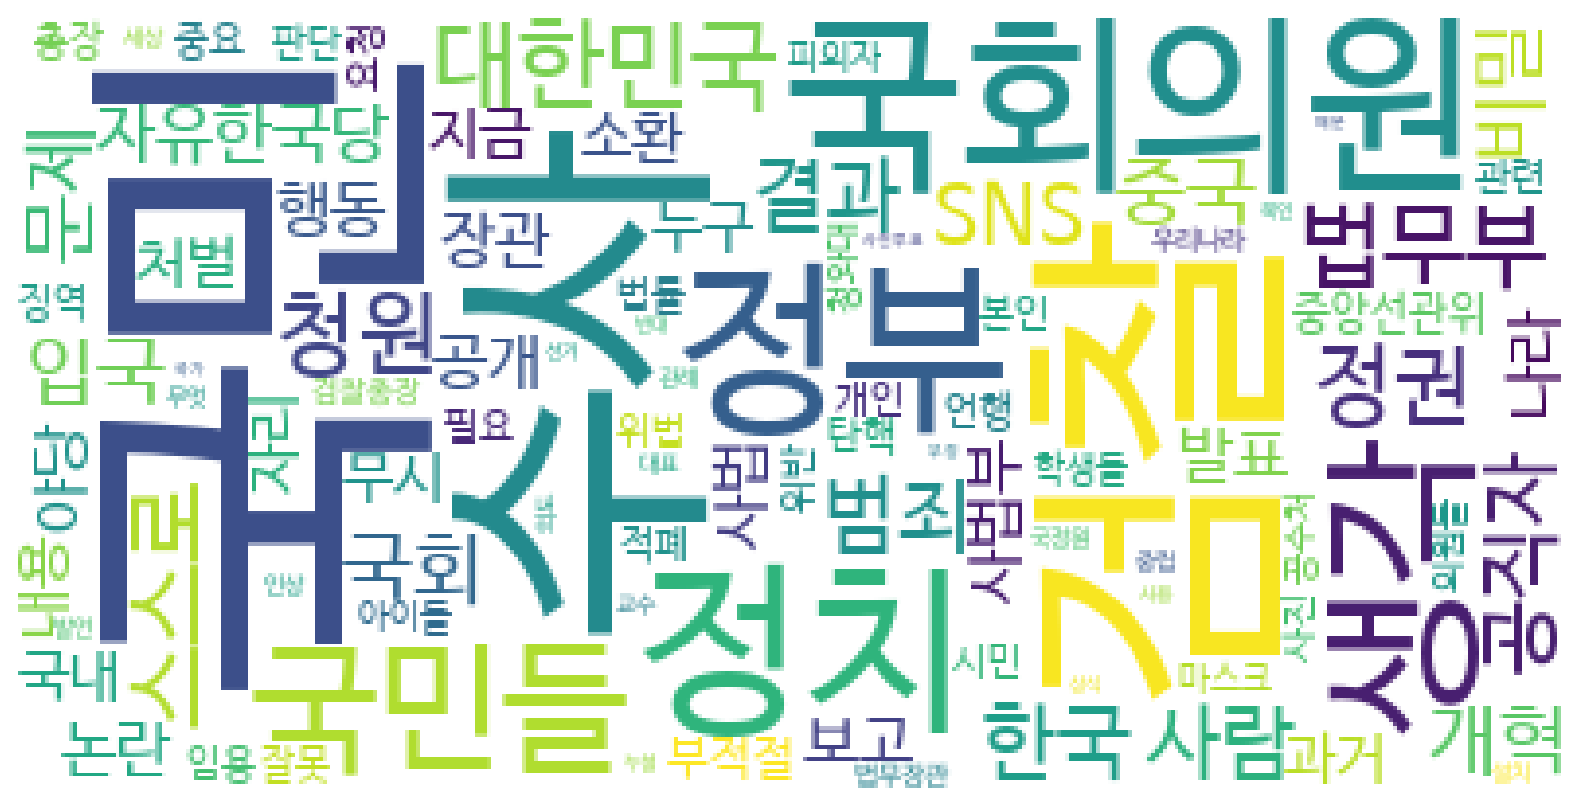

In [52]:
data2 = count2.most_common(length)
tmp_data = dict(data2)

wordcloud = WordCloud(font_path = fontpath,
                      relative_scaling = 0.4,
                      background_color= 'white',).generate_from_frequencies(tmp_data)
plt.figure(figsize = (14,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

정치개혁 분야에서는 '국회의원', '국민', '검찰', '수사', '정치', '정부' 키워드가 많이 나왔다는 것을 알 수 있다

In [53]:
# 안전/환경
pt_category3.head(5)

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변,청원인
9,박사방 회원 중 여아살해모의한 공익근무요원 신상공개를 원합니다.,2020-03-29,2020-04-28,519948,2020-05-22,https://www1.president.go.kr/petitions/587335,안전/환경,조주빈이 공익근무요원과 살해모의를 한 여아의 엄마입니다.2012년부터 2020년 지...,"안녕하십니까, 디지털소통센터장 강정수입니다. 오늘은 ‘N번방’ 사건과 관련한 청...",naver
28,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2020-03-18,2020-04-17,2715626,2020-03-24,https://www1.president.go.kr/petitions/586819,안전/환경,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,naver
29,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,2020-03-20,2020-04-19,2026252,2020-03-24,https://www1.president.go.kr/petitions/586880,안전/환경,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,naver
30,"가해자 n번방박사,n번방회원 모두 처벌해주세요",2020-03-20,2020-04-19,650579,2020-03-24,https://www1.president.go.kr/petitions/586885,안전/환경,n번방 박사라는 악마같은 인간은아동·청소년을 포함한 수십 명의 여성을 협박·강요해 ...,▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,naver
32,텔레그램 아동.청소년 성노예 사건 철저한 수사 및 처벌 촉구합니다!!,2020-03-10,2020-04-09,348634,2020-03-24,https://www1.president.go.kr/petitions/586522,안전/환경,파렴치한 인간들이 불쌍한 아동.청소년들을 속여 성노예가 되게 하여 입에 담기도 참담...,▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,naver


In [54]:
sentences3 = pt_category3['청원내용'].apply(preprocessing)
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(sentences3)
nouns3 = noun_extractor.extract()

nouns3

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (566, 284) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 106 nouns are extracted


{'4월': NounScore_v1(frequency=5, score=0.99961, known_r_ratio=0.5),
 'n번방': NounScore_v1(frequency=8, score=0.999769, known_r_ratio=1.0),
 '가족': NounScore_v1(frequency=18, score=0.8848872142857144, known_r_ratio=0.875),
 '가해자': NounScore_v1(frequency=11, score=0.9906327142857142, known_r_ratio=1.0),
 '감형': NounScore_v1(frequency=7, score=0.7519545, known_r_ratio=1.0),
 '강력': NounScore_v1(frequency=5, score=0.9982565, known_r_ratio=0.8),
 '개인': NounScore_v1(frequency=4, score=0.999867, known_r_ratio=0.5),
 '개정': NounScore_v1(frequency=2, score=1.0, known_r_ratio=0.5),
 '결과': NounScore_v1(frequency=11, score=0.997708, known_r_ratio=1.0),
 '경우': NounScore_v1(frequency=8, score=0.9992844, known_r_ratio=1.0),
 '계속': NounScore_v1(frequency=9, score=0.9847714999999999, known_r_ratio=0.8),
 '고통': NounScore_v1(frequency=5, score=0.5794314, known_r_ratio=1.0),
 '공개': NounScore_v1(frequency=5, score=0.9972182, known_r_ratio=1.0),
 '관심': NounScore_v1(frequency=5, score=0.9994460000000001, known_r_

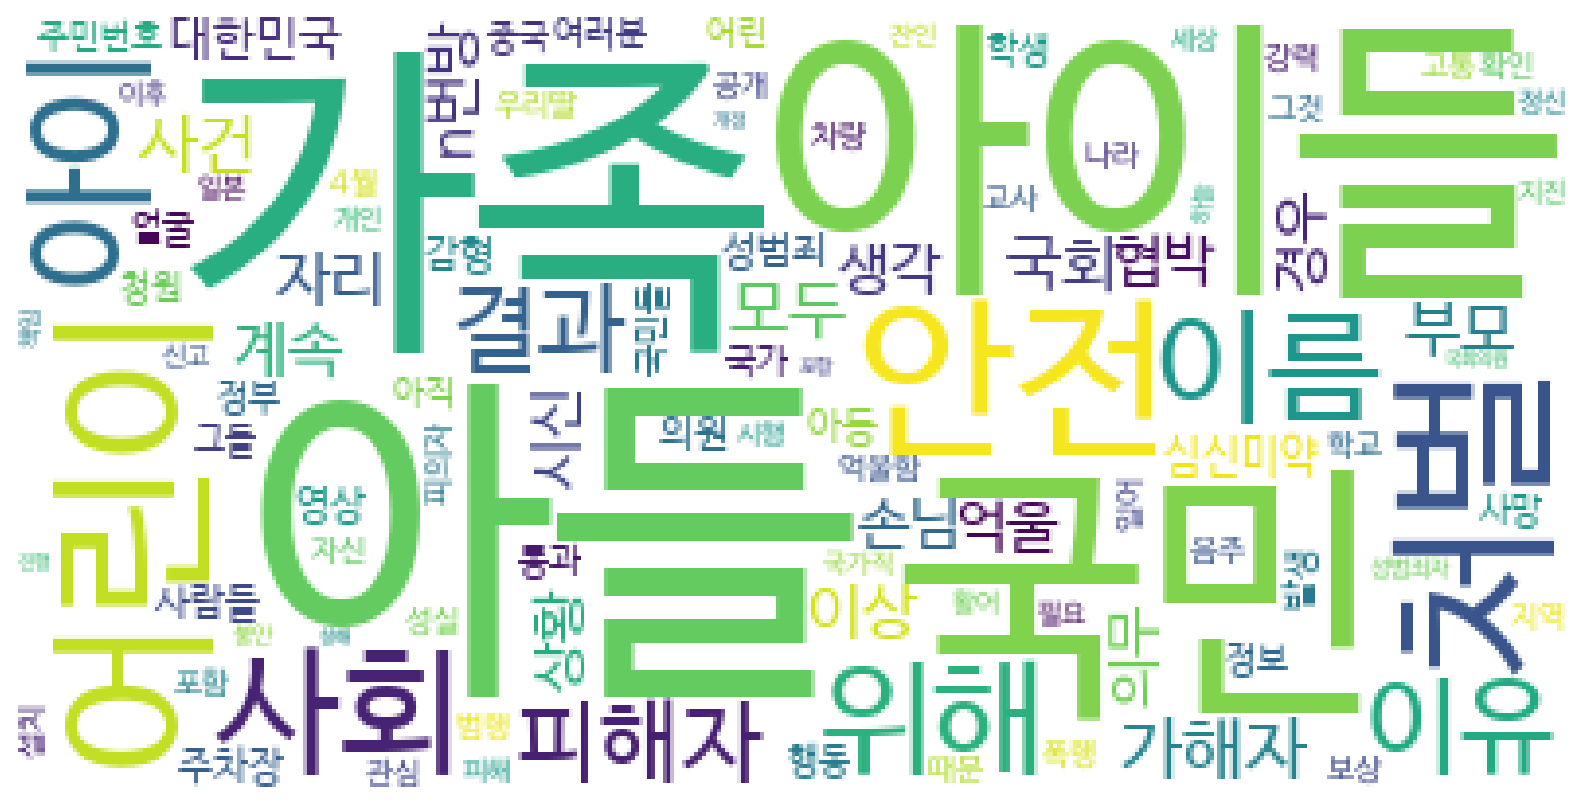

In [55]:
length = len(nouns3)
tdict3 = {}
for i in range(0,length-1):
  tdict3[list(nouns3.keys())[i]] = list(nouns3.values())[i].frequency
del tdict3['우리']
count3 = Counter(tdict3)
data3 = count3.most_common(length)
tmp_data = dict(data3)

wordcloud = WordCloud(font_path = fontpath,
                      relative_scaling = 0.4,
                      background_color= 'white',).generate_from_frequencies(tmp_data)
plt.figure(figsize = (14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

안전/환경 분야에서는 '가족', '국민', '아이들', '아들', '처벌', '안전' 키워드가 많이 나왔다는 것을 알 수 있다

### 상위 카테고리 관심도 변화

온라인 공론장으로서의 청와대 청원은 현 사회의 이슈를 드러내는 한가지 척도가 될 수 있다. 이를 알아보기 위해서 상위 3가지 카테고리의 시간순 청원 참여인원수의 추이를 분석해보고자 하였다. 상위 카테고리 선정 기준은 앞서 wordcloud에서 제시한 인권/성평등, 정치개혁, 안전/환경 분야이다.

In [56]:
petition = pd.read_csv('Final BlueHouse Petition data.csv',index_col=0, 
                       parse_dates=['청원시작일'])

#### 인권/성평등 분야 관심도 변화

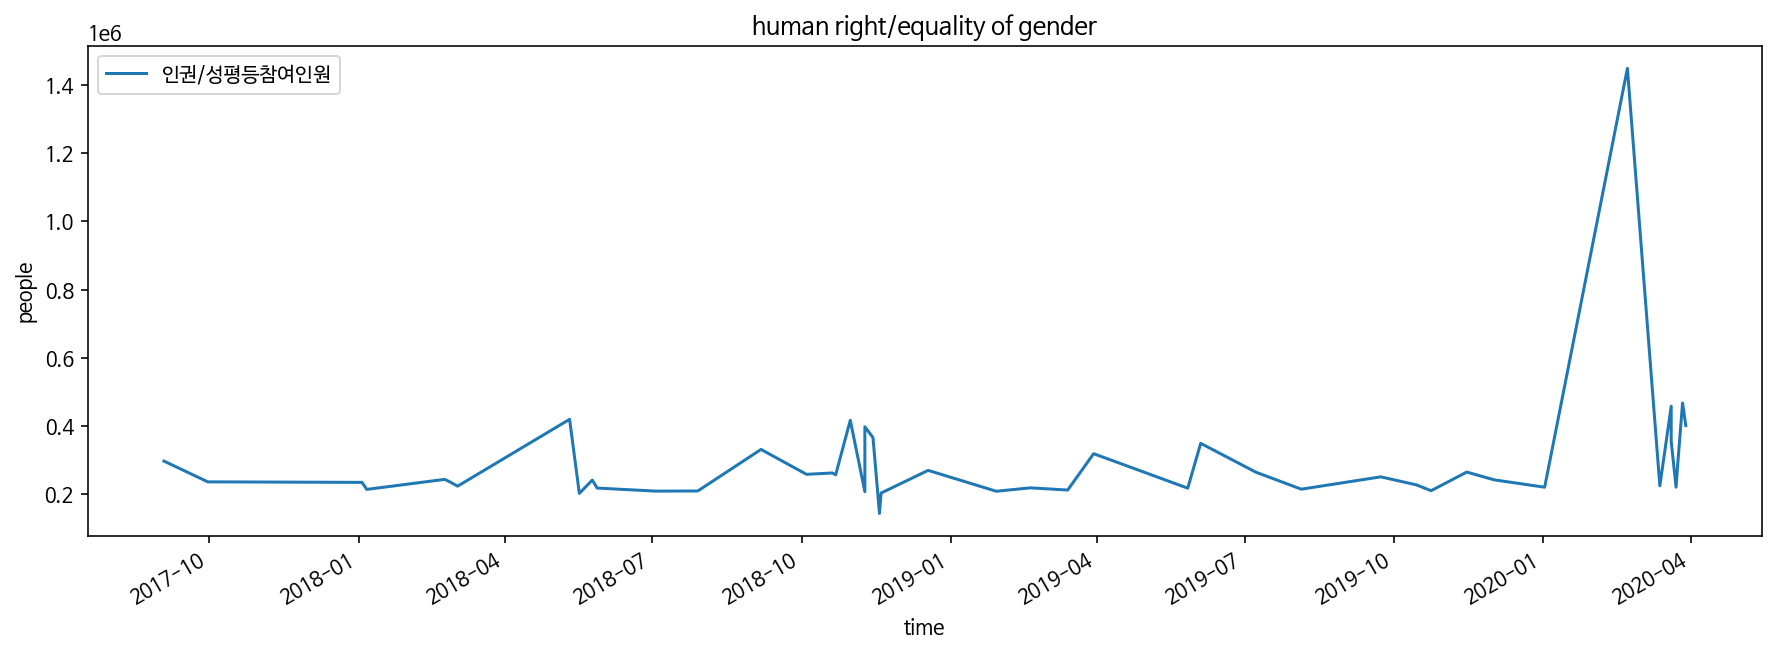

In [57]:
category1 = petition[ (petition['카테고리'] == '인권/성평등') ]
category1 = category1[['청원시작일','참여인원']]
category1.rename(columns = {"참여인원": "인권/성평등참여인원"}, inplace=True)

ax = category1.plot(x = '청원시작일', y='인권/성평등참여인원',figsize=(15,5))
plt.title("human right/equality of gender")
plt.xlabel("time")
plt.ylabel("people")
plt.show()

2018년 4-7월 경에는 홍대누드크로키 모델의 불법촬영 사건, 합정 불법 누드촬영 사건, 미투 운동을 악용하는 사람들을 처벌하기 위한 무고죄 특별법 제정 촉구로 인한 청원이 등장하였으며, 2018년 8월 ~ 2019년 1월에는 웹하드 카르텔과 디지털 성범죄사건, 조두순 출소 반대, 조재범 코치 강력 수사 촉구 등 미투 사건에 대한 청원이 등장하였다. 2019년 4월에는 故장자연씨 사건 재수사 청원으로, 2019년 7월에는 성폭행, 살인 가해자 사형에 관한 청원이, 2020년 2월에는신천지 대구교회 집단감염으로 인한 신천지 강제 해산 청원, 2020년 3-4월에는 미성년자를 포함한 일반여성을 대상으로 성착취 영상을 찍도록 협박하고 해당영상을 판매하는 n번방 사건 발생으로 인한 청원참여 인원 급증하였다. 또한 2020년 3월  n번방 사건을 맡은 오덕식 부장판사의 자격박탈 청원, 다크웹 운영자인 손모씨의 미국 법무부 강제소환을 요구하는 청원이 등장하였다. 
 
이러한 사건들로 인해 청와대 인권/성평등 관련 청원에 참여한 인원이 특정한 시기에 급격하게 증가한 것으로 추정되며, 2020년 3월에는 n번방 사건으로 인해 인권/성평등 관련 청원 중 최다 참여인원 수를 기록했다. 

#### 정치개혁 관심도 변화

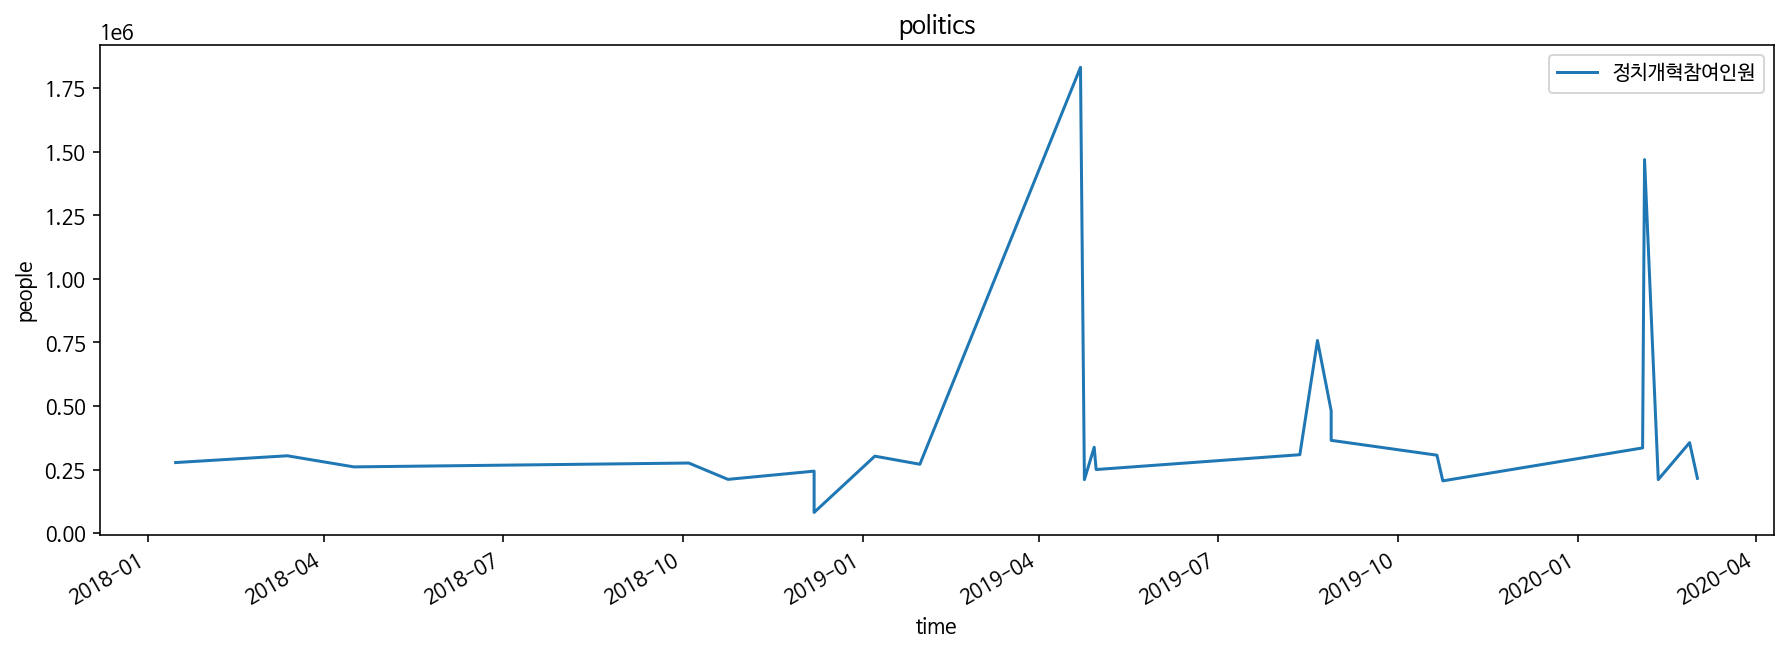

In [58]:
category3 = petition[ (petition['카테고리'] == '정치개혁') ]
category3 = category3[['청원시작일','참여인원']]
category3.rename(columns = {"참여인원": "정치개혁참여인원"}, inplace=True)

category3.plot(x = '청원시작일', y='정치개혁참여인원',figsize=(15,5))
plt.title("politics")
plt.xlabel("time")
plt.ylabel("people")
plt.show()

정치개혁 분야의 관심도가 급증한 시기의 사건을 정리해보면 아래와 같다.

1. 2019년 2월 ~ 4월:선거법, 공수처법 패스트트랙

자유한국당 정당해산 청원 

여, 야는 속히 공수처 신설하라

JTBC 뉴스 최악의 동물국회 EP1. 극한 충돌 빚은 국회의 일주일! 

2. 2019년 8월 ~ 9월: 조국사태

청와대는 조국 법무부장관 후보자의 임명을 반드시 해주십시오!! 

기밀누설죄를 범한 윤석열 총장을 처벌해 주십시요. 

3. 2020년 2월 ~ 3월: 코로나19 사태

문재인 대통령 탄핵을 촉구합니다. 

문재인 대통령님의 탄핵을 원하지 않습니다. 

이러한 사건들로 인해 안전, 정치개혁 카테고리의 관심도가 급증했으며 이 중 2019년 4월에 관심도가 가장 높다는 것을 알 수 있다. 2020년 4월에는 제 21대 국회의원선거가 일어나면서 그와 관련된 논란에 관한 청원요구가 많은 것으로 볼 수 있다. 
또 코로나19 사태가 점점 심각해지면서 문재인 대통령의 코로나 대응에 관한 논란이 일어나면서 문재인 대통령에 대한 비판이 불거져 청원요구가 증가한 것으로 본다.

#### 안전/환경 관심도 변화



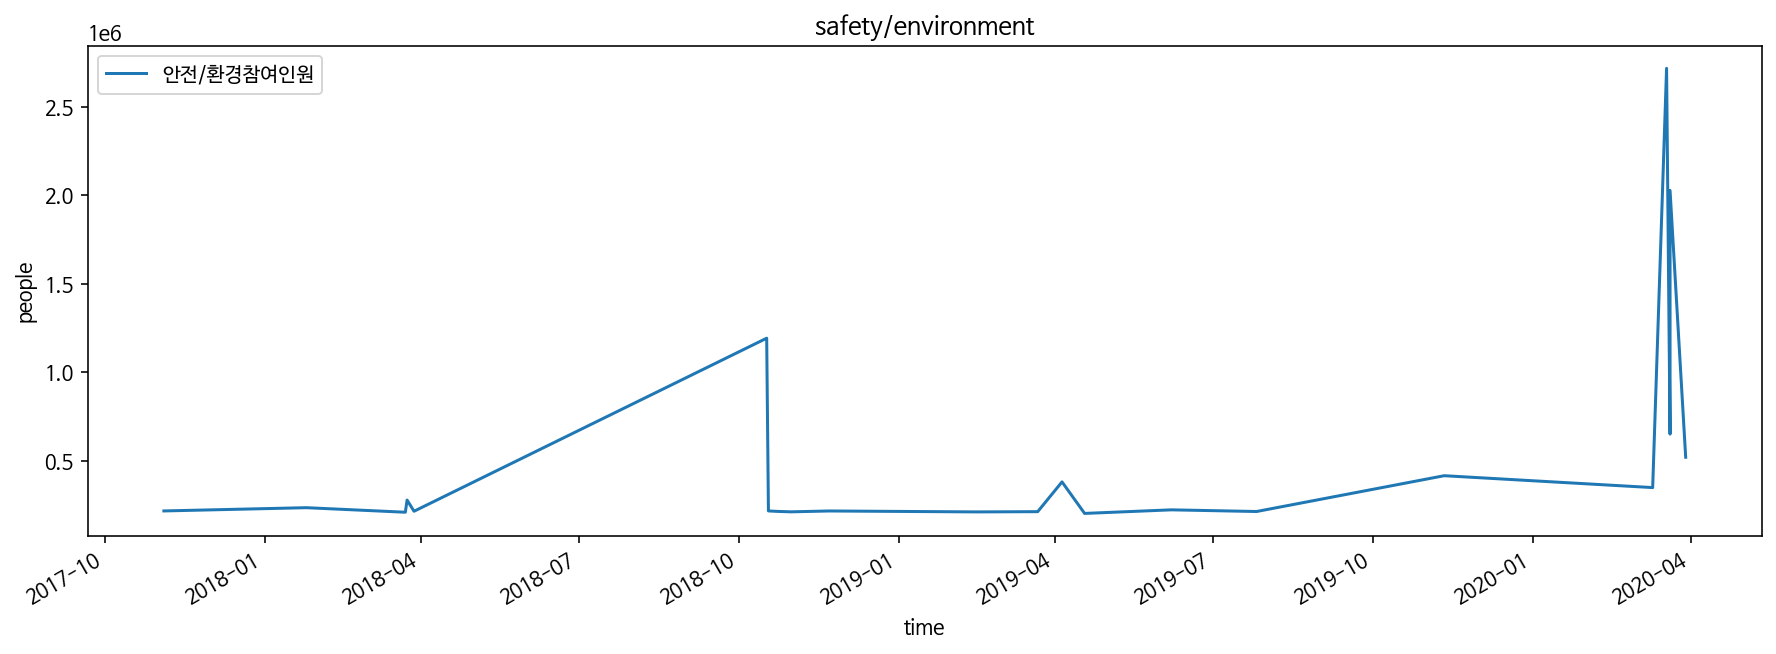

In [59]:
category2 = petition[ (petition['카테고리'] == '안전/환경') ]
category2 = category2[['청원시작일','참여인원']]
category2.rename(columns = {"참여인원": "안전/환경참여인원"}, inplace=True)

category2.plot(x = '청원시작일', y='안전/환경참여인원',figsize=(15,5))
plt.title("safety/environment")
plt.xlabel("time")
plt.ylabel("people")
plt.show()

첫번째로, 2018년 4월에서 7월은 폭염, 오존, 미세먼지로 인해 관심도가 급증하였으며,
두 번째로 2018년 10월은 강서구 피씨방 살인사건과 강서구 아파트 살인사건으로 인해 관심도가 급증하였다. 
세 번째로, 2019년 4월은 중국발 미세먼지로 인해 미세먼지와 관련된 정부의 대책, 미세먼지를 방지할 수 있는 방법 등에 대한 관심도가 급증했다.
네 번째로, 2019년 10월에서 2020년 1월은 스쿨존 민식이법 국회 통과로 인해 관심도가 급증했고,
마지막으로 2020년 4월 이후는 N번방 사건으로 관심도가 급증하였다.

이러한 사건들로 인해 안전, 환경 카테고리의 관심도가 급증한 것으로 볼 수 있으며 이중에 가장 관심도가 높았던 시기는 2020년 4월경으로 볼 수 있다. 이시기에는 텔레그램 n번방 사건이 터지면서 n번방 용의자 신상공개 요구 및 가해자 처벌에 대한 요구를 원하는 사람들이 많아 청원에 참여한 것으로 볼 수 있다.

#### 상위 3 카테고리 관심도 변화

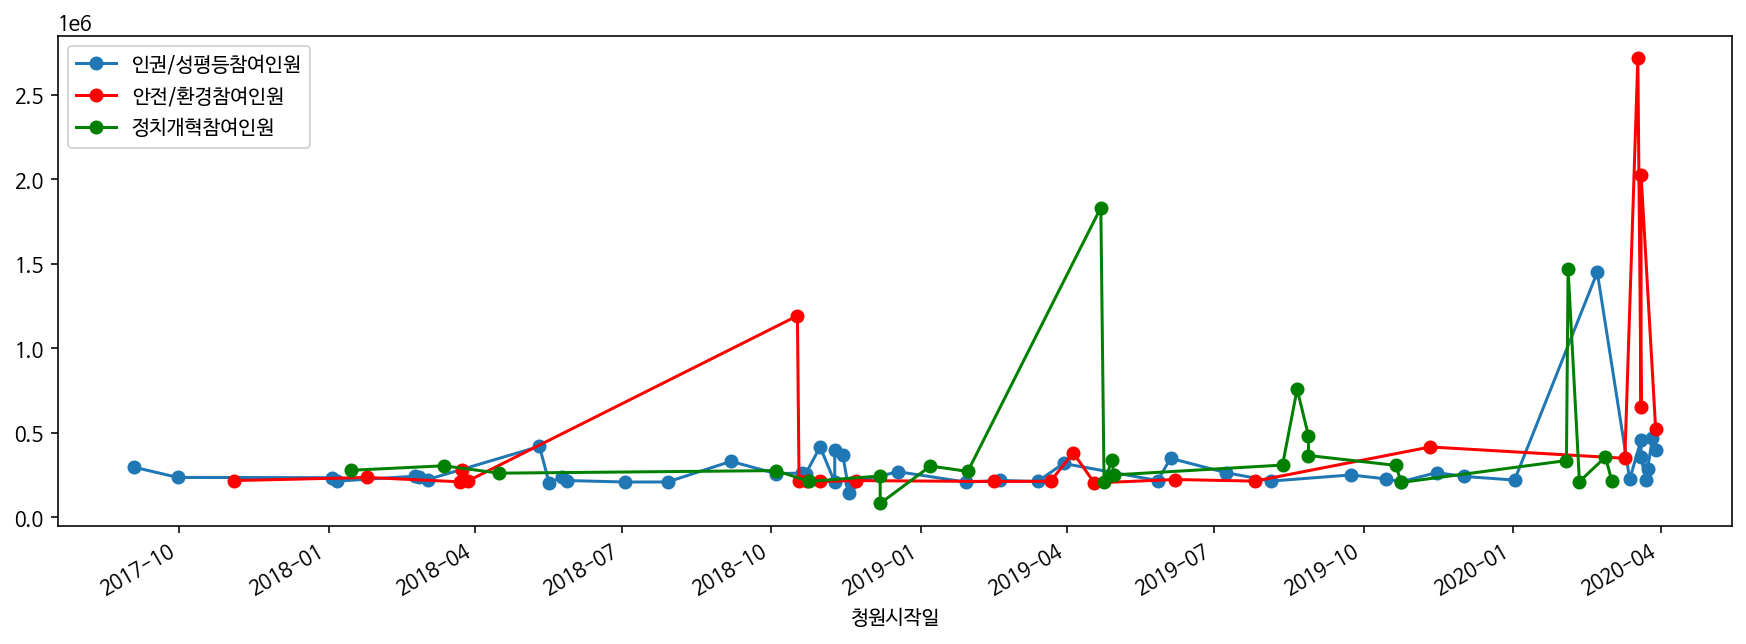

In [60]:
ax = plt.gca()

category1.plot(kind='line',x='청원시작일',y='인권/성평등참여인원',ax=ax, figsize=(15,5),marker='o')
category2.plot(kind='line',x='청원시작일',y='안전/환경참여인원', color='red', ax=ax,marker='o')
category3.plot(kind='line',x='청원시작일',y='정치개혁참여인원', color='green', ax=ax,marker='o')
plt.show()


3가지 카테고리의 관심도 변화를 한꺼번에 시각화한 결과, 2020년 1월과 4월 사이에 3가지 카테고리별 청원인원을 나타내는 선그래프가 모두 솟구치는 것을 볼 수 있다. 이를 통해 2020년 1월과 4월사이에는 코로나19사태와 텔레그램 n번방사건들로 인해 많은 사람들이 그와 관련된 수많은 청원에 관심이 쏠려 3가지 카테고리의 관심도가 동시에 높았던 시기임을 알 수 있었다. 따라서 한국사회의 첨예한 이슈가 어느정도 청와대 청원을 통해 드러난다는 것을 확인할 수 있다.

### 카테고리별 참여수

In [61]:
petition = pd.read_csv('Final BlueHouse Petition data.csv', 
                       index_col=0, parse_dates=['청원시작일','청원종료일','청원답변일'])
petition['청원 답변기간'] = (petition['청원답변일'] - petition['청원시작일']).dt.days

In [62]:
petition_cate = petition.groupby('카테고리')['참여인원','청원 답변기간'].agg({'참여인원':'sum','청원 답변기간':'mean'})
petition_cate['청원수'] = petition['카테고리'].value_counts()
petition_cate['청원수 대비 참여인원'] = petition_cate['참여인원'] / petition_cate['청원수']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [63]:
petition_cate.sort_values('참여인원', ascending=False)

,참여인원,청원 답변기간,청원수,청원수 대비 참여인원
카테고리,,,,
인권/성평등,13547006,47.347826,46,294500.130435
안전/환경,11327073,47.181818,22,514866.954545
정치개혁,9871168,52.458333,24,411298.666667
기타,8844755,51.217391,23,384554.565217
문화/예술/체육/언론,3945615,52.133333,15,263041.000000
육아/교육,3359645,62.250000,12,279970.416667
보건복지,2218061,51.166667,6,369676.833333
외교/통일/국방,1810542,46.800000,5,362108.400000
반려동물,1714853,48.500000,8,214356.625000


참여인원은 인권/성평등, 안전/환경 순으로 많으나 이는 청원수가 다른 카테고리에 비해 많은 결과이기도 하다. 따라서 비교를 위해서는 청원수 대비 참여인원을 정규화할 필요가 있다. 

#### 청원수 대비 참여인원 정규화 
정규화 이전 이상치 데이터 처리를 한 후에 각 카테고리별 분석을 진행한다.

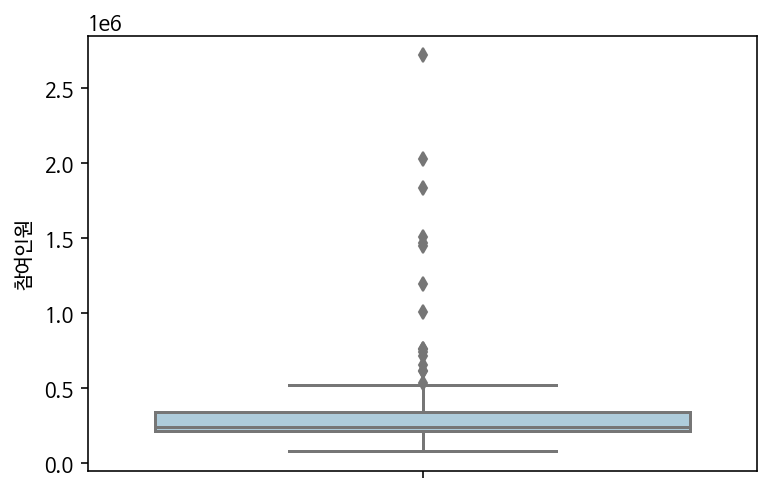

In [64]:
sns.boxplot(y="참여인원", data=petition, palette="Paired")

boxplot에서 볼 수 있듯이 참여인원수가 많은 상위 7개의 청원을 이상치 데이터로 처리한다.

In [65]:
petition.sort_values('참여인원').head(7)

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변,청원인,청원 답변기간
104,국회의원 연봉인상을 반대합니다.,2018-12-07,2019-01-06,81590,2019-01-07,https://www1.president.go.kr/petitions/462618,정치개혁,현재 우리나라의 의원 연은 1인당 GDP 대비 5배 수준으로 OECD국가들 중에서...,<정혜승 디지털소통센터장> 안녕하세요. 디지털소통센터장 정혜승입니다. 새해 첫 ...,naver,31
115,포항 약국 칼부림 사건의 가해 남성을 제대로 처벌하라.,2018-11-18,2018-12-18,142715,2018-12-11,https://www1.president.go.kr/petitions/445550,인권/성평등,지난 6월 정신지체장애 남성(46세 정**)이 약국에 들어와 무고한 약사와 직원을 ...,<정혜승 디지털소통센터장> 안녕하세요. 디지털소통센터 센터장 정혜승 입니다. 오...,twitter,23
60,동물 학대 처벌 강화 그리고 유해 유튜브(유튜버 ***) 단속 강화 청원,2019-07-29,2019-08-28,201320,2019-09-27,https://www1.president.go.kr/petitions/581713,반려동물,한 유튜버가 동물 학대를 유튜브에 전시하고 사람들이 항의하는 댓글을 달자욕설에 대한...,안녕하세요. 청와대 디지털소통센터장 강정수입니다. 오늘은 ‘동물학대 처벌 강화와 ...,twitter,60
146,합정 **** 불법 누드촬영,2018-05-17,2018-06-16,201590,2018-05-21,https://www1.president.go.kr/petitions/235102,인권/성평등,한 유명 유튜버의 사례저는 성범죄 피해자입니다. 꼭 한번만 제 이야기를 들어주세요....,<정혜승 뉴미디어 비서관> 안녕하십니까. 뉴미디어비서관 정혜승입니다. 오늘 11...,naver,4
108,"경찰은 ‘일베 여친, 전여친 몰카사건’을 철저히 수사해서 범죄자들 처벌하라",2018-11-19,2018-12-19,202548,2018-12-26,https://www1.president.go.kr/petitions/446686,인권/성평등,"2018년 11월 18일 ‘일간 베스트’ 사이트에 여친인증, 전여친인증 등의제목의 ...",<정혜승 디지털소통센터장> 안녕하세요. 청와대 디지털소통센터장 정혜승입니다. 오늘...,naver,37
73,진주 방화 및 살인 범죄자에 대해서 무관용 원칙이 필요합니다.,2019-04-18,2019-05-18,202804,2019-06-14,https://www1.president.go.kr/petitions/579612,안전/환경,아파트에 고의로 불을 피운것도 모자라 대피하는 인원에 대해서묻지마 살인을 저지른 범...,안녕하세요. 청와대 디지털소통센터장 정혜승입니다. 오늘은 “진주 방화 및 살인 범죄...,naver,57
40,"계엄령 문건 수사 관련, 윤석열 검찰청장에 대한 수사를 촉구합니다.",2019-10-24,2019-11-23,205668,2020-01-22,https://www1.president.go.kr/petitions/583274,정치개혁,"국민들의 안전을 위협했던 계엄령에 대한 수사가 엉망으로 진행되었음에도 불구하고, 그...",안녕하십니까? 청와대 디지털소통센터장 강정수입니다. 오늘은 기무사 계엄령 문건 수...,kakao,90


In [66]:
petition.drop([104,115,60,146,108,73,40], inplace=True)

petition_cate_re = petition.groupby('카테고리')['참여인원','청원 답변기간'].agg({'참여인원':'sum','청원 답변기간':'mean'})
petition_cate_re['청원수'] = petition['카테고리'].value_counts()
petition_cate_re['청원수 대비 참여인원'] = petition_cate['참여인원'] / petition_cate['청원수']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
from sklearn import preprocessing

x = petition_cate_re['청원수 대비 참여인원'].values.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
petition_cate_norm = pd.DataFrame(x_scaled, columns=['청원수 대비 참여인원'], index=petition_cate_re.index)
petition_cate_norm[['참여인원','청원 답변기간', '청원수']] = petition_cate[['참여인원','청원 답변기간', '청원수']]
petition_cate_norm.sort_values('청원수 대비 참여인원', ascending=False)

,청원수 대비 참여인원,참여인원,청원 답변기간,청원수
카테고리,,,,
안전/환경,1.000000,11327073,47.181818,22
미래,0.710741,855883,75.000000,2
정치개혁,0.655359,9871168,52.458333,24
기타,0.566363,8844755,51.217391,23
일자리,0.561320,383039,61.000000,1
보건복지,0.516855,2218061,51.166667,6
외교/통일/국방,0.491670,1810542,46.800000,5
인권/성평등,0.266691,13547006,47.347826,46
교통/건축/국토,0.233742,1422993,58.600000,5


In [68]:
petition_cate_norm.drop(['미래','일자리','성장동력','행정','경제민주화'], inplace=True)

In [69]:
petition_cate_norm.sort_values('청원수 대비 참여인원', ascending=False)

,청원수 대비 참여인원,참여인원,청원 답변기간,청원수
카테고리,,,,
안전/환경,1.000000,11327073,47.181818,22
정치개혁,0.655359,9871168,52.458333,24
기타,0.566363,8844755,51.217391,23
보건복지,0.516855,2218061,51.166667,6
외교/통일/국방,0.491670,1810542,46.800000,5
인권/성평등,0.266691,13547006,47.347826,46
교통/건축/국토,0.233742,1422993,58.600000,5
육아/교육,0.218341,3359645,62.250000,12
문화/예술/체육/언론,0.162006,3945615,52.133333,15


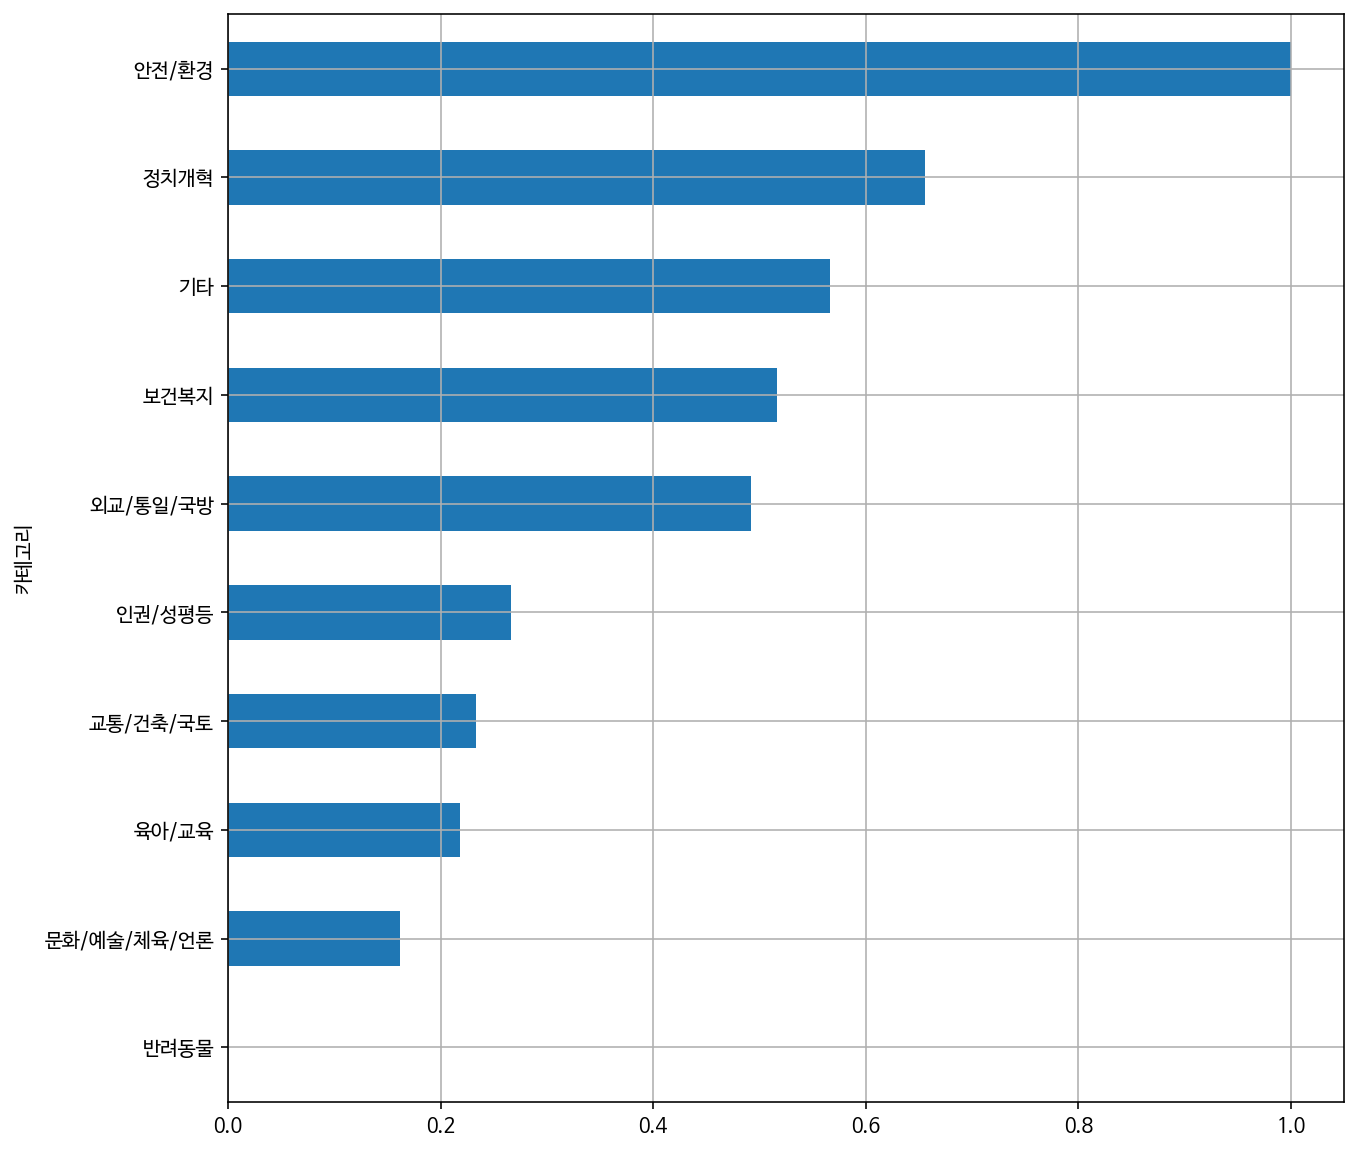

In [70]:
petition_cate_norm['청원수 대비 참여인원'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

정규화된 청원수 대비 참여인원을 비교해볼 때, 안전/환경, 정치개혁, 기타의 분야에서 높은 청원동의 수를 보여준다는 것을 알 수 있다. 이에 비해 반려동물이나 문화/예출/체육/언론, 육아/교육은 낮은 청원동의 수를 얻는다는 것을 파악할 수 있다. 앞서 청원수와 청원참여인원에서 높은 카테고리에 속했던 인권/성평등 영역은 정규화한 결과를 보았을 때 청원수는 많을 수 있으나 실제 참여인원은 다른 카테고리와 비교해보았을 때 중간 수준에 속한다는 것 또한 확인할 수 있다.

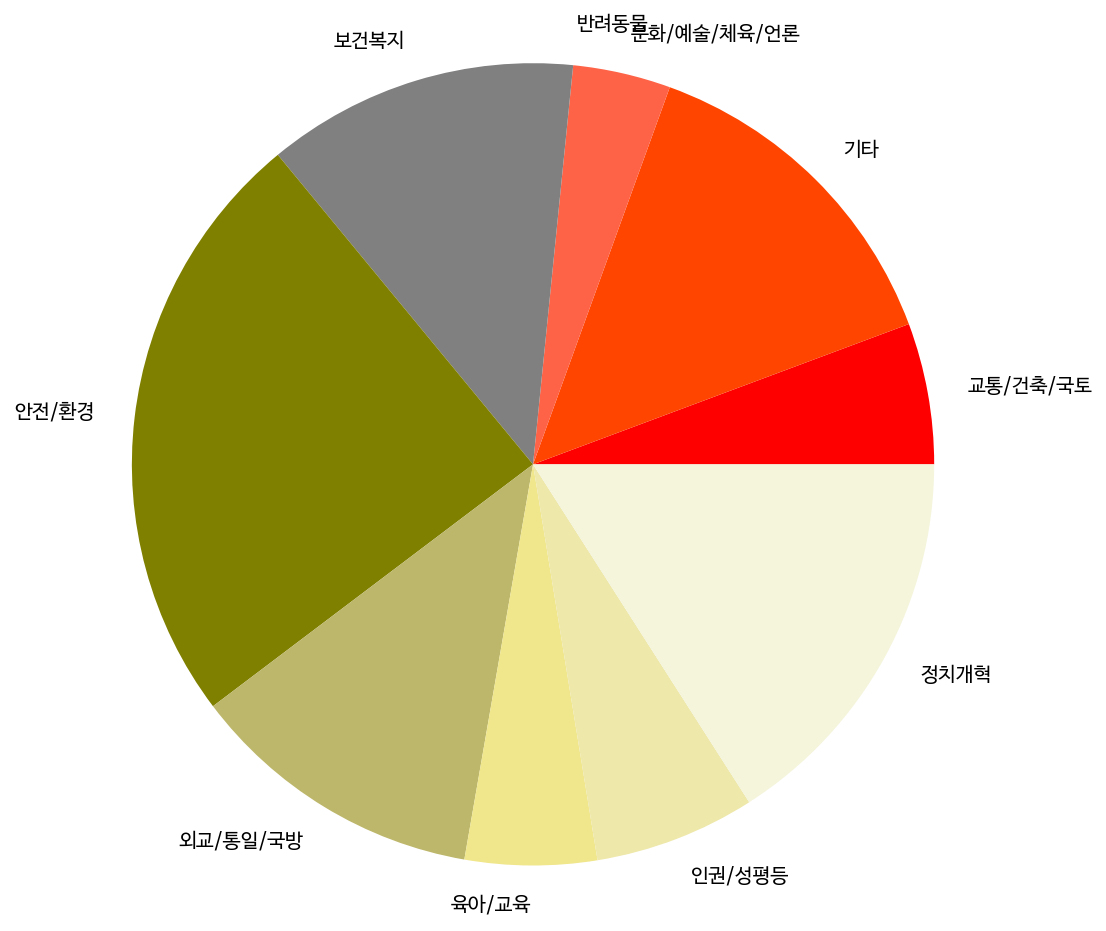

In [71]:
petition_cate_norm.reset_index(inplace=True)
group_names2 = petition_cate_norm['카테고리']
group_sizes2 = petition_cate_norm['청원수 대비 참여인원']
plt.figure(figsize=(8,8))
plt.pie(group_sizes2, labels = group_names2,textprops = {'fontsize':10}, colors=['red', 'orangered','tomato','dimgray','gray', 'olive','darkkhaki','khaki', 'palegoldenrod', 'beige', 'lightgoldenrodyellow','cornsilk','whitesmoke', 'ghostwhite'])
plt.axis('equal')
plt.show()

파이그래프로 시각화한 결과, 안전/환경 분야가 25% 정도, 상위 3분야가 절반 이상의 참여인원을 보인다는 것을 확인할 수 있다.

## 결론 

먼저 관심도 분석을 통해 알아본 결과 청와대 청원은 어느정도 한국 사회의 이슈가 되는 사건들을 청와대 청원으로 가져와 정치적 의제로 제시하고 있다는 것을 알 수 있다. 또한 이에 대해 청와대의 답변을 받음으로써 사건 해결의 단서를 제공한다는 점에서 직접 민주주의의 일환으로 해석될 수 있는 여지 또한 존재한다. 또한 기존 정치 제도권 내에서 입법의 과정을 거치는 것보다 평균 50일 내로 답변을 얻을 수 있다는 점 또한 온라인 공론장의 중요한 역할이라고 볼 수 있다. 더불어 청원수 상위 카테고리 인권/성평등, 정치개혁, 안전/환경 영역과 카테고리별 참여수 상위 카테고리 안전/환경, 정치개혁 영역은 사람들이 많이 참여하는 분야이면서 한국 사회에서 이슈가 첨예하게 드러나는 영역이라고 판단할 수 있다. 

하지만 본 프로젝트는 한계를 가진다. 먼저 모든 청원 데이터를 가져온 것이 아니라 청원 답변을 받은 일부 데이터만 추출하여 분석했기 때문에 온라인 공론장으로서의 청와대 청원의 역할을 전적으로 살펴보지 못했다는 한계를 가진다. 더불어 '온라인'공론장인만큼 온라인(naver, facebook 등)에 접근한 사람들만을 대상으로 이를 분석하기 때문에 온라인 접근성이 쉬운 사람들을 대상으로 청원 시스템이 돌아갈 수밖에 없다는 한계를 가진다. 따라서 청원수나 참여인원 기준 상위 카테고리 선정이 온라인 접근이 가능한 사람들을 대상으로 한다는 점에서 온라인 접근이 용이하지 못한 사람들(예를 들면 노인 등)의 목소리를 담지 못했다는 청와대 청원 자체의 근본적인 한계도 존재한다. 
